In [7]:
# DECISION TREES IMPELEMENTATION

# Importing dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image, display
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as pltimg
from dtreeviz.trees import dtreeviz 


In [8]:
#Reading and spliting our dataset to training and testing data
trainingData = pd.read_csv("../Data/TrainingData.csv")
testingData = pd.read_csv("../Data/TestingData.csv")

# Training Data 
targets = trainingData["home_team_result"]
targets = targets.values.reshape(-1,1)
features = trainingData.drop(["home_team_name", "away_team_name", "home_team_goal_count", "away_team_goal_count", "home_team_result","winner_encoded"],axis=1).values
featuresTrain = features
targetsTrain = targets

# Testing Data
targets = testingData["home_team_result"]
targets = targets.values.reshape(-1,1)
features = testingData.drop(["home_team_name", "away_team_name", "home_team_goal_count", "away_team_goal_count", "home_team_result"],axis=1).values
featuresTest = features
targetsTest = targets

In [9]:
#Training for Decision Tree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(featuresTrain, targetsTrain)

#Testing for Decision Tree
dtree.predict(featuresTest)
print(dtree.score(featuresTest,targetsTest))

0.5625


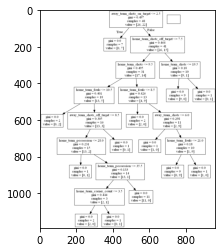

<Figure size 1080x1080 with 0 Axes>

<function matplotlib.pyplot.savefig(*args, **kwargs)>

In [10]:
# Generate graphs
df = pd.read_csv("../Data/TestingData.csv")
featuresName = df.drop(["home_team_name", "away_team_name", "home_team_goal_count", "away_team_goal_count", "home_team_result"],axis=1)

df = tree.export_graphviz(dtree, out_file=None, feature_names=featuresName.columns.values.tolist())
graph = pydotplus.graph_from_dot_data(df)
graph.write_png('mydecisiontree2.png')
img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.figure(figsize=(15,15))
plt.show()
plt.savefig

In [11]:
#dtreeviz graph

targetsTrain = targetsTrain.reshape(-1)
viz = dtreeviz(dtree, featuresTrain, targetsTrain,
                target_name="target",
                feature_names=featuresName.columns.values.tolist(),
                class_names=[0.,1.])
viz
viz.save("decision_tree.svg")